In [14]:
import pickle
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [15]:
sns.set_theme()

In [16]:
EXPERIMENT = "54"
RESULTS_DIR = Path().absolute().parent / "results" / EXPERIMENT
RESULTS_DIR.exists()

True

In [17]:
CLASS_MAP = {
    0: "Background",
    1: "Soil",
    2: "Bedrock",
    3: "Sand",
    4: "Big Rock"
}

## Training history

In [18]:
with (RESULTS_DIR / "history.pkl").open("rb") as f:
    history: dict[str, list[float]] = pickle.load(f)
history.keys()

dict_keys(['accuracy', 'loss', 'mean_iou', 'val_accuracy', 'val_loss', 'val_mean_iou', 'learning_rate'])

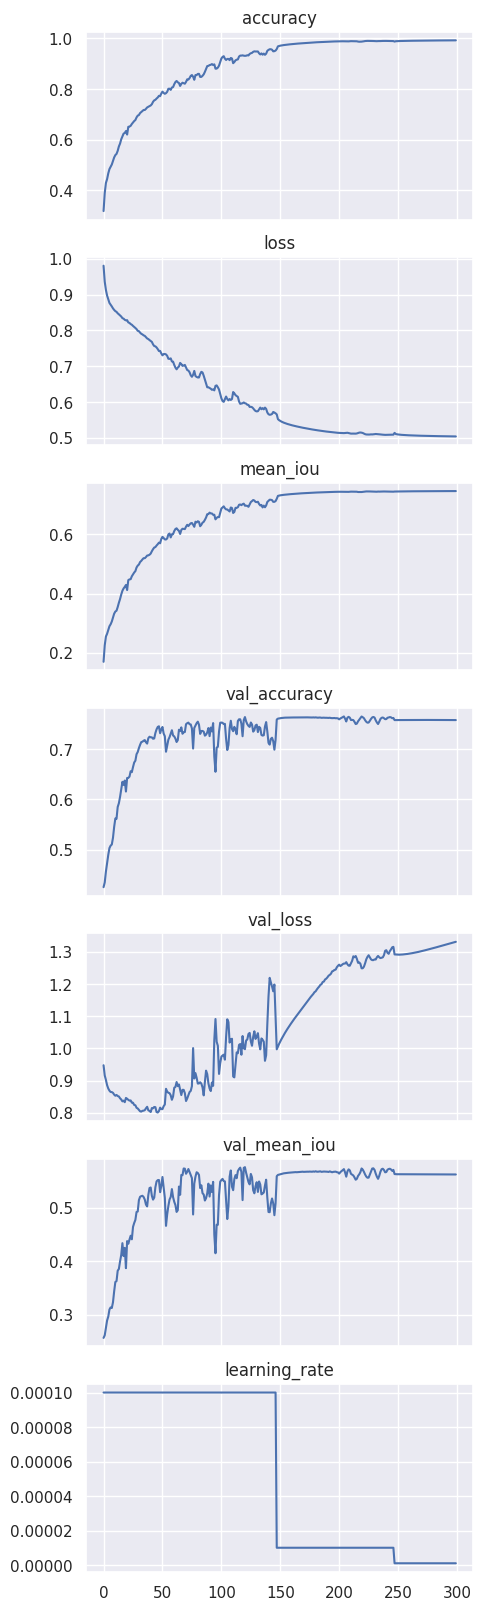

In [19]:
_, axes = plt.subplots(
    nrows=len(history),
    sharex=True,
    sharey=False,
    figsize=(5, 20),
)
for ax, (metric, values) in zip(axes.flat, history.items()):
    ax.plot(values)
    ax.set_title(metric)

## Validation predictions

In [20]:
with np.load(RESULTS_DIR / "val.npz") as data:
    x: np.ndarray = data["x"]
    y: np.ndarray = data["y"].squeeze()
    y_hat: np.ndarray = data["y_hat"]

print(x.shape)
print(y.shape)
print(y_hat.shape)

(251, 64, 128, 1)
(251, 64, 128)
(251, 64, 128)


Mean IoU: 0.48844495806233457


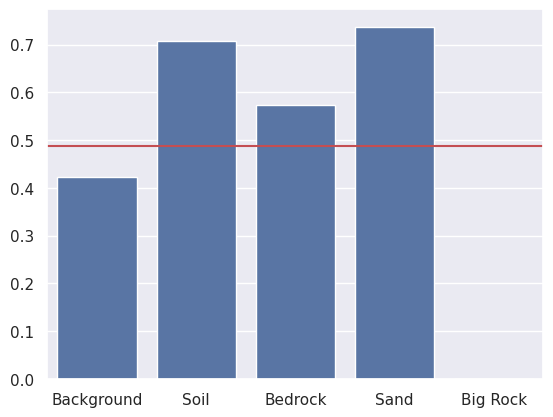

In [21]:
class_iou = {}
for class_, class_name in CLASS_MAP.items():
    y_mask = y == class_
    y_hat_mask = y_hat == class_
    intersection = np.sum(y_mask & y_hat_mask)
    union = np.sum(y_mask | y_hat_mask)
    class_iou[class_name] = intersection / (union + 1e-10)

mean_iou = sum(class_iou.values()) / len(class_iou)
print(f"Mean IoU: {mean_iou}")
ax = sns.barplot(class_iou)
ax.axhline(mean_iou, c="r")

In [22]:
big_rock_images = np.any(y == 4, axis=(1, 2))
big_rock_indices = np.nonzero(big_rock_images)[0]
print(big_rock_indices.shape)

(0,)


In [23]:
_, axes = plt.subplots(nrows=big_rock_indices.size, ncols=3, figsize=(15, 10))
for i, ax in zip(big_rock_indices, axes):
    ax[0].axis("off")
    ax[1].axis("off")
    ax[2].axis("off")

    ax[0].imshow(x[i], cmap="gray")
    ax[0].set_title(f"Image {i}")
    ax[1].imshow(y[i], cmap="viridis", vmin=0, vmax=4)
    ax[1].set_title(f"Mask {i}")
    ax[2].imshow(y_hat[i], cmap="viridis", vmin=0, vmax=4)
    ax[2].set_title(f"Predicted Mask {i}")


ValueError: Number of rows must be a positive integer, not 0

<Figure size 1500x1000 with 0 Axes>